In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from datetime import datetime
from datetime import timedelta

In [3]:
# Read in data as pandas dataframe and display first 5 rows
df = pd.read_csv('/Users/iris/Desktop/cloudmile/project_b.csv')
#df.head()

# Feature Extraction
df["date"] = pd.to_datetime(df["date"])
df["hour"] = df["date"].dt.hour
df["dayofweek"] = df["date"].dt.dayofweek
df["quarter"] = df["date"].dt.quarter
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df["dayofyear"] = df["date"].dt.dayofyear
df["sin_day"] = np.sin(df["dayofyear"])
df["cos_day"] = np.cos(df["dayofyear"])
df["dayofmonth"] = df["date"].dt.day
df["weekofyear"] = df["date"].dt.weekofyear

df = df.drop(["date", "year", "hour"], axis = 1)
print(df)

           cost      cost_3      cost_4      cost_5      cost_6      cost_7  \
0    140.645159         NaN         NaN         NaN         NaN         NaN   
1    140.645159         NaN         NaN         NaN         NaN         NaN   
2    140.645159  140.645159         NaN         NaN         NaN         NaN   
3    140.645159  140.645159  140.645159         NaN         NaN         NaN   
4    140.645159  140.645159  140.645159  140.645159         NaN         NaN   
..          ...         ...         ...         ...         ...         ...   
329  243.289870  243.289871  243.289871  243.289871  243.289871  243.289871   
330  243.289870  243.289871  243.289871  243.289871  243.289871  243.289871   
331  243.289870  243.289870  243.289871  243.289871  243.289871  243.289871   
332  243.289871  243.289870  243.289870  243.289871  243.289871  243.289871   
333  243.551699  243.377147  243.355328  243.342236  243.333509  243.327275   

     dayofweek  quarter  month  dayofyear   sin_day

/var/folders/8n/4zrtw6h1653b5dyztfhfqxlr0000gq/T/ipykernel_72438/3799815457.py:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["weekofyear"] = df["date"].dt.weekofyear


In [4]:
#Validation
train = df[:258]
validation = df[258:289]

# Train validation split
X_train = train.drop(["cost"], axis = 1)
y_train = train["cost"]
X_validation = validation.drop(["cost"], axis = 1)
y_validation = validation["cost"]

window = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]

for each in window:
    prediction = []
    for i in range(31):
        rolling_train = train[-each:]
        X_train = rolling_train.drop(["cost"], axis = 1)
        y_train = rolling_train["cost"]
        rolling_validation = validation[i:i+1]
        X_validation = rolling_validation.drop(["cost"], axis = 1)
        
        # Model Training
        reg = RandomForestRegressor(n_estimators=1000)
        reg.fit(X_train, y_train)

        # Prediction
        yhat = reg.predict(X_validation)
        train = df[:258+i]
        prediction.append(yhat)
    
    # Model Evaluation
    from sklearn.metrics import mean_squared_error as MSE
    rmse = np.sqrt(MSE(y_validation, prediction))
    print(each, "RMSE: %f" %(rmse))

5 RMSE: 2.666553
10 RMSE: 3.627265
15 RMSE: 3.774415
20 RMSE: 3.138504
25 RMSE: 3.131133
30 RMSE: 3.202765
35 RMSE: 3.805444
40 RMSE: 3.805372
45 RMSE: 2.959869
50 RMSE: 2.824441
55 RMSE: 2.819560
60 RMSE: 2.706780
65 RMSE: 2.616900
70 RMSE: 2.608847
75 RMSE: 2.608331
80 RMSE: 2.610213
85 RMSE: 2.608539
90 RMSE: 2.611324


RMSE: 5.430761


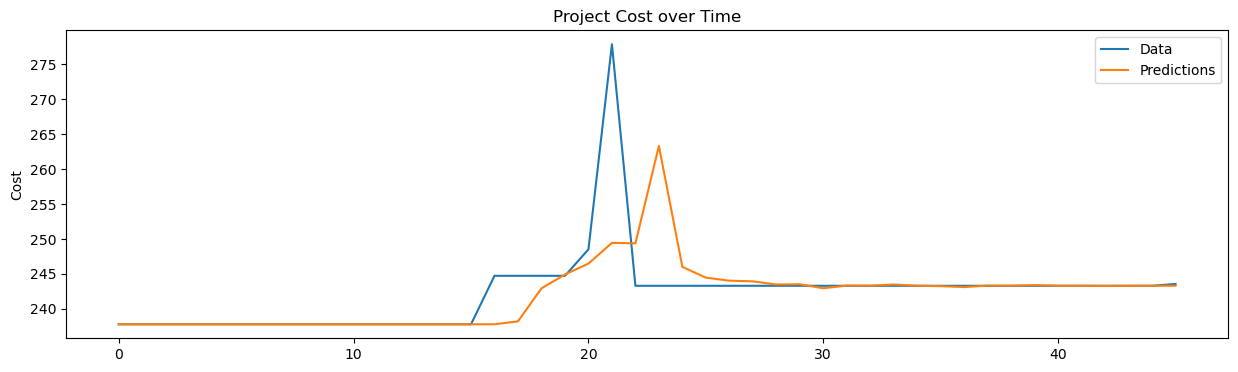

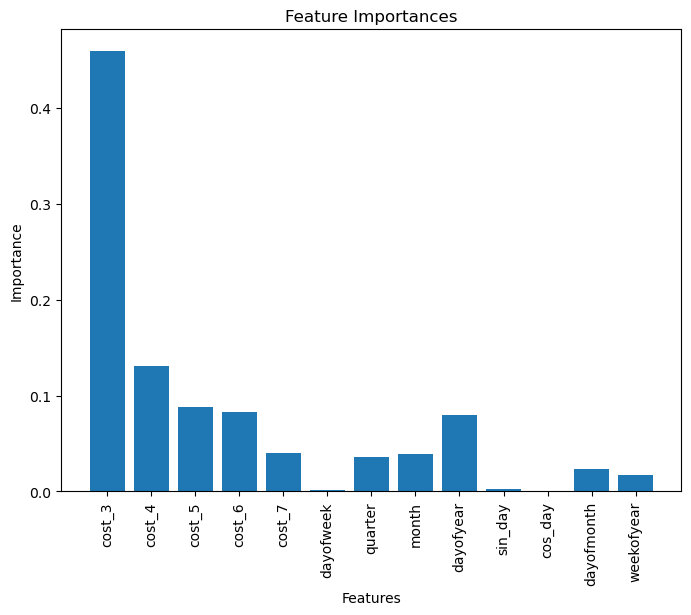

In [5]:
#Test
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

train = df[:288]
test = df[288:]

# Train test split
X_train = train.drop(["cost"], axis=1)
y_train = train["cost"]
X_test = test.drop(["cost"], axis=1)
y_test = test["cost"]

window_size = 75
prediction = []
lst_f = []
for i in range(46):
    rolling_train = train[-window_size:]
    X_train = rolling_train.drop(["cost"], axis=1)
    y_train = rolling_train["cost"]
    rolling_test = test[i:i+1]
    
    if rolling_test.shape[0] > 0:
        X_test = rolling_test.drop(["cost"], axis=1)
        
        # Model Training
        reg = RandomForestRegressor(n_estimators=1000)
        reg.fit(X_train, y_train)
        
        # Prediction
        yhat = reg.predict(X_test)
        prediction.append(yhat[0])  # Assuming yhat is a single value
        
        # Features
        element = reg.feature_importances_
        lst_f.append(element)
        
    else:
        prediction.append(0)  # Handle the case when rolling_test is empty
        
    train = df[:288+i]

# Ground truth vs. prediction
plt.figure(figsize=(15, 4))
plt.plot(y_test.values)
plt.plot(prediction)

plt.legend(('Data', 'Predictions'))
plt.title('Project Cost over Time')
plt.ylabel('Cost')

# Model Evaluation
rmse = np.sqrt(MSE(y_test, prediction))
print("RMSE: %f" % rmse)

# Features plot
lst_f = np.array(lst_f)
plot = np.mean(lst_f, axis=0)

# Bar plot of feature importances
plt.figure(figsize=(8, 6))
plt.bar(X_train.columns, plot)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()